In [192]:
#packages
import pandas as pd
from google.cloud import bigquery
from google.oauth2 import service_account
import db_dtypes
import google.oauth2.credentials
import google_auth_oauthlib.flow
import os
from google.cloud import bigquery
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [169]:
class BigQueryService():
    def __init__(self):
        self.client = bigquery.Client.from_service_account_json('/Users/Anusha/Downloads/yelp-project-374514-e8101d165db2.json')

    def execute_query(self, sql, verbose=True):
        if verbose == True:
            print(sql)
        job = self.client.query(sql)
        return job.result()

    def query_to_df(self, sql, verbose=True):
        """high-level wrapper to return a DataFrame"""
        results = self.execute_query(sql, verbose=verbose)
        records = [dict(row) for row in list(results)]
        df = DataFrame(records)
        return df


In [170]:
bq_service = BigQueryService()
print(bq_service)

In [178]:
print("------------")
print("QUERY:")
sql = """
    SELECT * FROM `yelp-project-374514`.yelp_data.yelp_filtered_data
"""

results = list(bq_service.execute_query(sql, verbose=True))
records = [dict(row) for row in results]
print("------------")
print("RESULTS:" , len(records))

yelp_df = DataFrame(records)


------------
RESULTS: 675078
------------
QUERY:

    SELECT * FROM `yelp-project-374514`.yelp_data.yelp_filtered_data

------------
RESULTS: 675078


In [183]:
yelp_df.describe()

AttributeError: 'NotebookFormatter' object has no attribute 'get_result'

               stars          funny           cool         useful
count  675078.000000  675078.000000  675078.000000  675078.000000
mean        3.946163       2.133462       3.268237       5.920338
std         0.528497       4.758553       6.062142       7.172731
min         3.000000       0.000000       0.000000       0.000000
25%         3.500000       0.000000       1.000000       3.000000
50%         4.000000       1.000000       2.000000       4.000000
75%         4.500000       3.000000       4.000000       7.000000
max         5.000000     792.000000     404.000000     539.000000

<AxesSubplot:xlabel='stars', ylabel='count'>

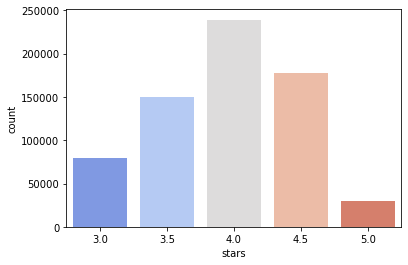

In [194]:
sns.countplot(x='stars',data=yelp_df,palette='coolwarm')

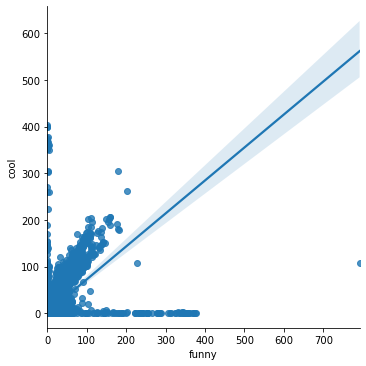

In [200]:
sns.lmplot(x='funny',y='cool',data=yelp_df)

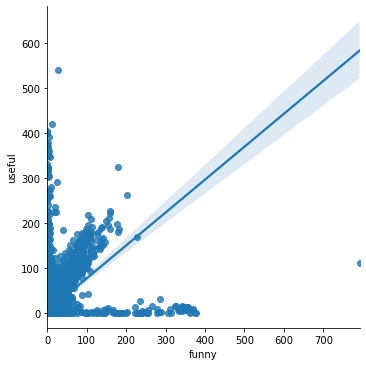

In [201]:
sns.lmplot(x='funny',y='useful',data=yelp_df)